In [2]:
import numpy as np
import json
import matplotlib.pyplot as plt
import pickle

In [53]:
def plotMetrics_dict(dict_, hp = 'LR'):
    hp_ls = list(dict_.keys())
    print(hp_ls)
    fig, axs = plt.subplots(2, 3,  figsize=(8,6))

    # layers, train_loss_ls, test_loss_ls, train_acc_ls, test_acc_ls
    for i in range(len(hp_ls)):
        axs[0,i].plot(dict_[hp_ls[i]][0], label="Train" )
        axs[0,i].plot(dict_[hp_ls[i]][1],label="Test" )
        axs[0,i].set_title(hp + '=' + str(hp_ls[i]))
    
    for i in range(len(hp_ls)):
        axs[1,i].plot(dict_[hp_ls[i]][2], label="Train" )
        axs[1, i].plot(dict_[hp_ls[i]][3],label="Test" )
        # axs[i,0].set_title(hp + '=' + str(hp_ls[i]))
    
    for ax in axs.flat[:3]:
        ax.set(xlabel='Epoch', ylabel='Cross Entropy Loss')
        ax.set_ylim(1.4,2)
    
    for ax in axs.flat[3:]:
        ax.set(xlabel='Epoch', ylabel='Accuracy')
        ax.set_ylim(0.3,0.55)

    for ax in axs.flat:
        ax.label_outer()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc= 'center')
    plt.savefig(hp+".png")
    # plt.show()

['500', '2000', '5000']


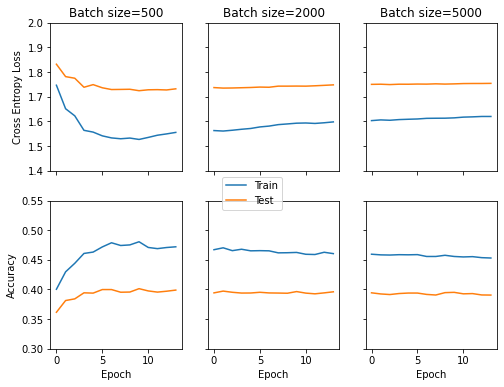

In [65]:
batch = json.load(open('Batch Size.json'))
plotMetrics_dict(batch, 'Batch size')

['5e-05', '0.0001', '0.0002']


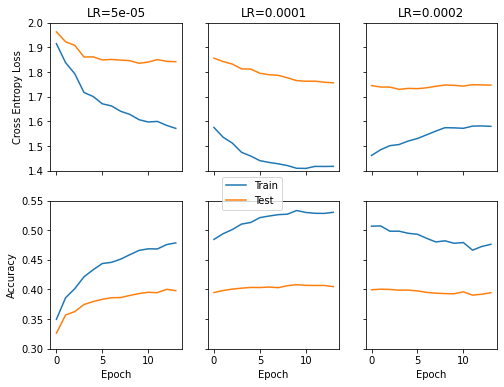

In [54]:
lr = json.load(open('Learning Rate.json'))
plotMetrics_dict(lr)

In [65]:
lr = json.load(open('Learning Rate.json'))
plotMetrics_dict(lr)

In [5]:
def plotMetrics(train_loss, test_loss, train_acc, test_acc, fig_name = '3FCLayers'):
    fig, axs = plt.subplots(2, 1,  figsize=(6, 8))
    axs[0].plot(train_loss, label="Train" )
    axs[0].plot(test_loss,label="Test" )
    axs[0].set_ylabel('Cross Entropy')
    axs[1].plot(train_acc, label = "Train")
    axs[1].plot(test_acc, label = "Test")
    axs[1].set_ylabel('Accuracy')
    
    for ax in axs.flat:
        ax.set(xlabel='Epoch')
    for ax in axs.flat:
        ax.label_outer()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc= 'center')
    plt.savefig(fig_name + '.png')

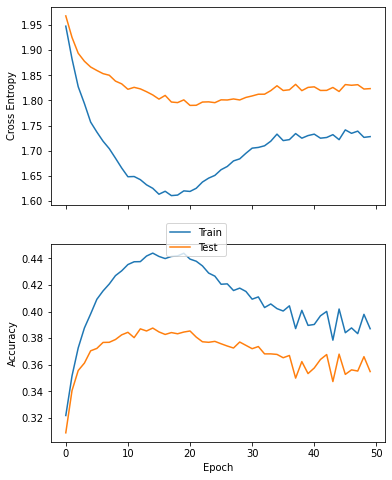

In [91]:

with open('3FCLayers', 'rb') as fp:
    n_list = pickle.load(fp)
plotMetrics(n_list[0], n_list[1], n_list[2], n_list[3])

In [73]:
def plotMetrics_2(dict_, fig_name):
    hp_ls = list(dict_.keys())
    print(hp_ls)
    fig, axs = plt.subplots(2, len(hp_ls),  figsize=(8,6))

    for i in range(len(hp_ls)):
        axs[0,i].plot(dict_[hp_ls[i]][0], label="Train" )
        axs[0,i].plot(dict_[hp_ls[i]][1],label="Test" )
        axs[0,i].set_title(fig_name + '=' + hp_ls[i])
        # axs[0,i].set_title(hp_ls[i])
    
    for i in range(len(hp_ls)):
        axs[1,i].plot(dict_[hp_ls[i]][2], label="Train" )
        axs[1, i].plot(dict_[hp_ls[i]][3],label="Test" )
        # axs[i,0].set_title(hp + '=' + str(hp_ls[i]))
    
    for ax in axs.flat[:len(hp_ls)]:
        ax.set(xlabel='Epoch', ylabel='Cross Entropy Loss')
        ax.set_ylim(0,26)
        # ax.set_ylim(0,4)
    
    for ax in axs.flat[len(hp_ls):]:
        ax.set(xlabel='Epoch', ylabel='Accuracy')
        ax.set_ylim(0.2,0.6)
        # ax.set_ylim(0,1)

    for ax in axs.flat:
        ax.label_outer()
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc= 'center')
    plt.savefig(fig_name+".png")

def read_pickle(filename):
    with open(filename, 'rb') as fp:
        n_list = pickle.load(fp)
    return n_list


['32', '2000', '5000']


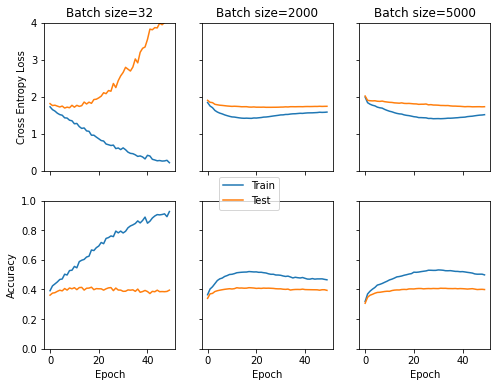

In [70]:
batch32 = read_pickle('MLP_2FC_32bsize_50ep')
batch2k = read_pickle('MLP_2FC_50ep')
batch5k = read_pickle('MLP_bsize_5k_50ep')
batch_size = {'32': batch32, '2000': batch2k, '5000': batch5k}
plotMetrics_2(batch_size, 'Batch size')

['0.01Xavier', '0.1Xavier', 'Xavier']


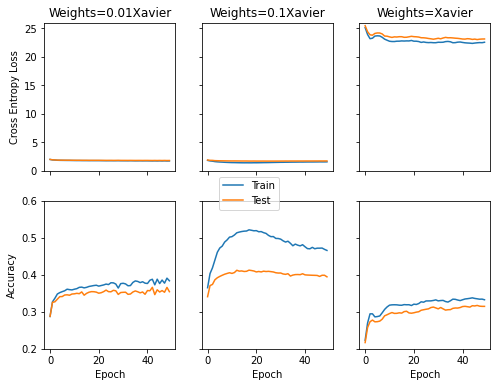

In [74]:
Xavier001 = read_pickle('MLP_Xavier001_50ep')
Xavier01 = read_pickle('MLP_Xavier01_50ep')
Xavier1 = read_pickle('MLP_Xavier1_50ep')
xavier = {'0.01Xavier': Xavier001, '0.1Xavier': Xavier01, 'Xavier' : Xavier1 }
plotMetrics_2(xavier, 'Weights')

In [ ]:
lr0

In [37]:
## Dropout versus no Dropout
basemodel = read_pickle('MLP_2FC_50ep')
noDropout = read_pickle('MLP_noDropout')

dropout_Dict = {'DropOut': basemodel, 'No DropOut':noDropout}
plotMetrics_2(dropout_Dict, 'DropoutvsNoDropout')

['0.2', '0.4', '0.6']


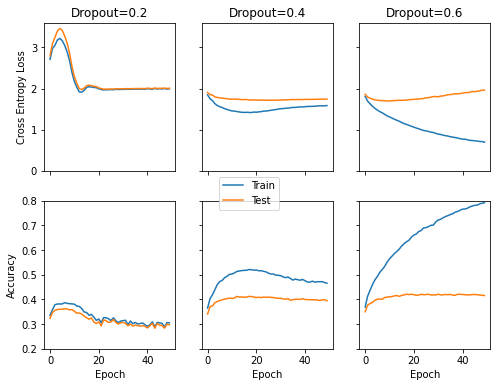

In [47]:
dropOut02 = read_pickle('MLP_Dropout02')
dropOut06 = read_pickle('MLP_Dropout06')
dropOutTuned = {'0.2': dropOut02, '0.4': basemodel, '0.6': dropOut06}
plotMetrics_2(dropOutTuned, 'Dropout')

In [81]:
import pickle
with open('listfile', 'wb') as fp:
    pickle.dump(data_1[0], fp)

In [82]:
with open('listfile', 'rb') as fp:
    n_list = pickle.load(fp)

In [83]:
n_list

[1.5757545757369085,
 1.536151710582374,
 1.5124879635394968,
 1.475271054875661,
 1.4601384463955573,
 1.4414605379660694,
 1.4342732540647,
 1.4286422431893557,
 1.4215665737020153,
 1.4106099028578931,
 1.4100492801340625,
 1.4182367435395795,
 1.4179201564226793,
 1.4184124361155557]